In [1]:
# Compare SP mode simulations

In [2]:
import xarray as xr  # NetCDF data handling
import matplotlib.pyplot as plt  # Plotting
import time  # Keeping track of runtime
import json  # For reading data dictionaries stored in json format
import datetime as dt  # for workaround with long simulations (beyond year 2262)
from pathlib import Path
import pandas as pd
import numpy as np

In [6]:
# Set general plotting optionscm = 1/2.54  # centimeters in inches
cm = 1/2.54  # centimeters in inches
DPI = 200
FIG_SIZE_CM = (9.5*cm, 7*cm)
TICK_LABEL_FONT_SIZE = 9
AX_LABEL_FONT_SIZE = 11

In [3]:
file_paths = {
    'IBSP': "alp4-1500-cosmo-IBSP",
    'IWSP': "alp4-1500-warmed-IWSP"
}

In [4]:
# Path to concatenated land archive output
output_data_path = f"../../results"

# Enter the names of single output files from each simulation, created with the 'combine_model_history_files' notebook.
file_path_IBSP = f"{output_data_path}/{file_paths['IBSP']}/alp4-1500-cosmo-IBSP.0-1500.nc"
file_path_IWSP = f"{output_data_path}/{file_paths['IWSP']}/alp4-1500-warmed-IWSP.0-1500.nc"

In [5]:
# Read data
file_paths = {
    'IBSP': file_path_IBSP,
    'IWSP': file_path_IWSP
}

data = {}

for dataset, path in file_paths.items():
    data[dataset] = xr.open_mfdataset(path, 
                                      combine='by_coords', 
                                      decode_times=True)

In [29]:
IBSP_GPP = data['IBSP']['FATES_GPP'].values.reshape(-1) 
IWSP_GPP = data['IBSP']['FATES_GPP'].values.reshape(-1) 
IWSP_GPP.shape

(18000,)

In [41]:
# Check if there is any difference in GPP between the two simulations
np.array_equiv(IBSP_GPP, IWSP_GPP) # Returns True if input arrays are shape consistent and all elements equal.


True

In [44]:
IBSP_NEP = data['IBSP']['FATES_NEP'].values.reshape(-1) 
IWSP_NEP = data['IBSP']['FATES_NEP'].values.reshape(-1) 
IWSP_NEP.shape

(18000,)

In [45]:
np.array_equiv(IBSP_NEP, IWSP_NEP)

True

In [46]:
IBSP_AUTORESP = data['IBSP']['FATES_AUTORESP'].values.reshape(-1) 
IWSP_AUTORESP = data['IBSP']['FATES_AUTORESP'].values.reshape(-1) 
IWSP_AUTORESP.shape

(18000,)

In [47]:
np.array_equiv(IBSP_AUTORESP, IWSP_AUTORESP)

True

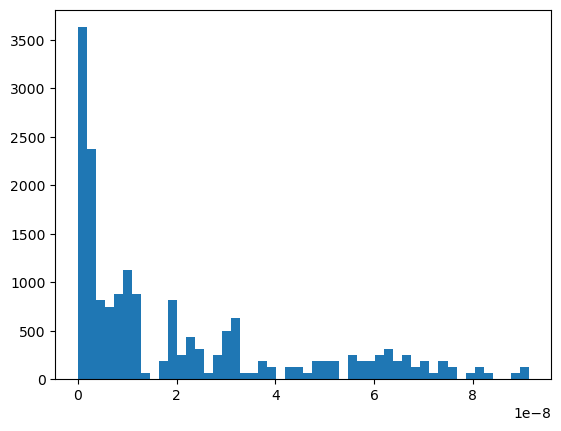

In [37]:
plt.hist(IBSP_GPP, bins=50)
plt.show()